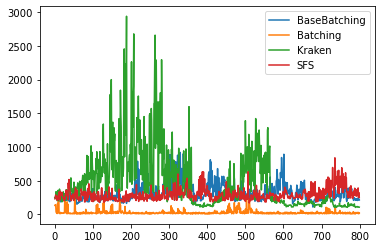

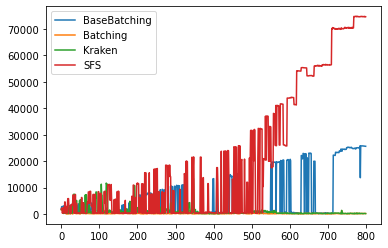

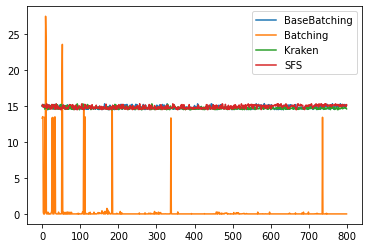

In [9]:

import pandas as pd
import glob
import matplotlib.pyplot as plt


CSV_NAMES = glob.glob("latency*.csv")
MEASUREMENTS = ["exec_time(ms)", "duration(ms)", "used_memory(MB)"]
for mea in MEASUREMENTS:
    for csv in CSV_NAMES:
        strategy = csv.split("_")[2]
        df = pd.read_csv(csv)
        df['duration(ms)'] = df['schedule_time(ms)'] + \
            df["exec_time(ms)"] + df['queue_time(ms)']

        if mea == 'used_memory(MB)':
            df[df[mea] < 0] = 0
        df[mea].plot(label=strategy)
    plt.legend()
    plt.show()
